In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses,Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [24]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [25]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]**2))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]**2))

In [26]:
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [49]:
input_image = Input(shape=(784,))
encoded = Dense(64,activation = "relu")(input_image)
decoded = Dense(784,activation = "sigmoid")(encoded)

autoencoder = Model(input_image,decoded)

In [50]:
autoencoder.compile(optimizer="nadam",loss = "binary_crossentropy",metrics = ["mean_squared_error"])

In [51]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [52]:
autoencoder.fit(x_train,x_train,epochs = 16,batch_size = 100,validation_data = (x_test,x_test))

Epoch 1/16
600/600 [==============================] - 5s 7ms/step - loss: 0.1828 - mean_squared_error: 0.0383 - val_loss: 0.1226 - val_mean_squared_error: 0.0189
Epoch 2/16
600/600 [==============================] - 4s 6ms/step - loss: 0.1082 - mean_squared_error: 0.0143 - val_loss: 0.0952 - val_mean_squared_error: 0.0104
Epoch 3/16
600/600 [==============================] - 4s 6ms/step - loss: 0.0900 - mean_squared_error: 0.0087 - val_loss: 0.0841 - val_mean_squared_error: 0.0071
Epoch 4/16
600/600 [==============================] - 4s 6ms/step - loss: 0.0822 - mean_squared_error: 0.0064 - val_loss: 0.0790 - val_mean_squared_error: 0.0055
Epoch 5/16
600/600 [==============================] - 4s 7ms/step - loss: 0.0787 - mean_squared_error: 0.0054 - val_loss: 0.0767 - val_mean_squared_error: 0.0049
Epoch 6/16
600/600 [==============================] - 4s 6ms/step - loss: 0.0768 - mean_squared_error: 0.0049 - val_loss: 0.0758 - val_mean_squared_error: 0.0046
Epoch 7/16
600/600 [========

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(392, activation='relu'),
    tf.keras.layers.Dense(392//2, activation='relu'),
    tf.keras.layers.Dense(392//4, activation='relu'),
    tf.keras.layers.Dense(392//8, activation='relu'),
    tf.keras.layers.Dense(392//8, activation='relu'),
    tf.keras.layers.Dense(392//2, activation='relu'),
    tf.keras.layers.Dense(392, activation='relu'),
    tf.keras.layers.Dense(392*2, activation='sigmoid')])

model.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'])


In [70]:
model.fit(x_train, x_train, batch_size=1024,epochs=10,validation_data=(x_test,x_test))

Epoch 1/10
59/59 [==============================] - 2s 19ms/step - loss: 0.0913 - accuracy: 0.0080 - val_loss: 0.0659 - val_accuracy: 0.0155
Epoch 2/10
59/59 [==============================] - 1s 12ms/step - loss: 0.0583 - accuracy: 0.0122 - val_loss: 0.0499 - val_accuracy: 0.0082
Epoch 3/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0426 - accuracy: 0.0133 - val_loss: 0.0368 - val_accuracy: 0.0124
Epoch 4/10
59/59 [==============================] - 1s 12ms/step - loss: 0.0341 - accuracy: 0.0128 - val_loss: 0.0305 - val_accuracy: 0.0123
Epoch 5/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0292 - accuracy: 0.0142 - val_loss: 0.0271 - val_accuracy: 0.0129
Epoch 6/10
59/59 [==============================] - 1s 13ms/step - loss: 0.0261 - accuracy: 0.0144 - val_loss: 0.0244 - val_accuracy: 0.0130
Epoch 7/10
59/59 [==============================] - 1s 12ms/step - loss: 0.0240 - accuracy: 0.0142 - val_loss: 0.0224 - val_accuracy: 0.0145
Epoch 8/10
59

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 784)               615440    
                                                                 
 dense_48 (Dense)            (None, 392)               307720    
                                                                 
 dense_49 (Dense)            (None, 196)               77028     
                                                                 
 dense_50 (Dense)            (None, 98)                19306     
                                                                 
 dense_51 (Dense)            (None, 49)                4851      
                                                                 
 dense_52 (Dense)            (None, 49)                2450      
                                                                 
 dense_53 (Dense)            (None, 196)              

In [72]:
decoded_images = autoencoder.predict(x_test) 
decoded_images = model.predict(x_test)

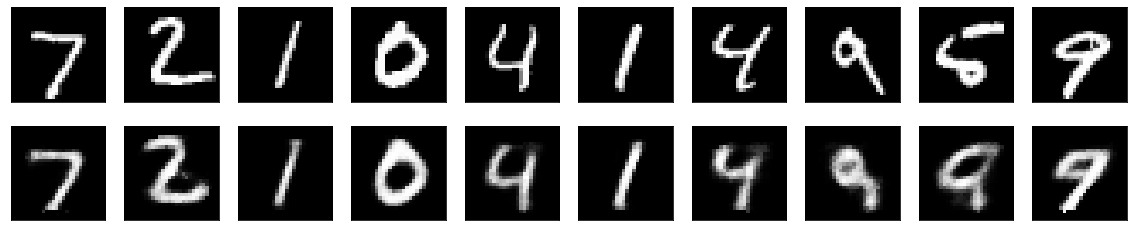

In [73]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)